In [4]:
# Загрузка библиотек
import pandas as pd
import numpy as np

from IPython.display import Image, display

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from tqdm.autonotebook import tqdm

In [5]:
# Загрузка данных
df_cleaned = pd.read_csv('data/df_cleaned.csv')
df_cleaned.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


## 3. Бутстрэп

Сделаем 10000 бутстрэп выборок и посчитаем средние значения конверсии по каждой версии посадочной страницы. Затем посмотрим на распределние средних.

In [ ]:
boot_1d = []

for i in tqdm(range(10000), leave=False):
    boot_mean = df_cleaned.sample(frac=1, replace=True).groupby('landing_page').converted.mean()
    boot_1d.append(boot_mean)
    
# Сделаем датафрейм
boot_1d = pd.DataFrame(boot_1d)

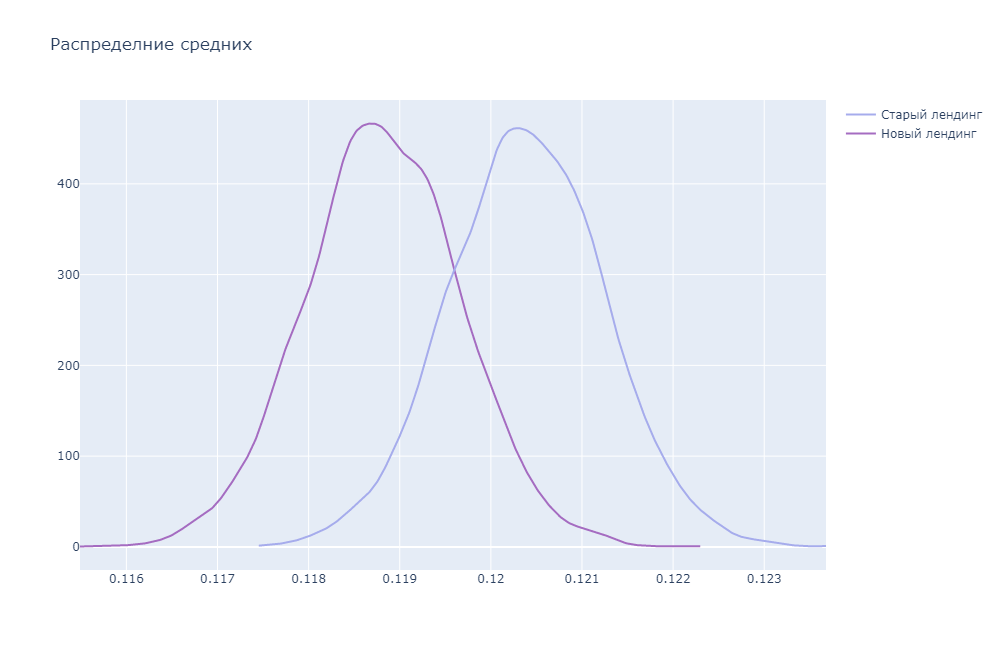

In [7]:
hist_data = [boot_1d.new_page, boot_1d.old_page]

group_labels = ['Новый лендинг', 'Старый лендинг']
colors = ['#A56CC1', '#A6ACEC']

fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_hist=False, bin_size=.01, show_rug=False)

fig.update_layout(height=650, width=1000, title_text='Распределние средних')
fig.show()

display(Image(filename='img/avg_distribution.png', width=800))

Для обеих версий посадочной страницы мы получили распределение, похожее на нормальное.

В колонке diff посчитаем разницу между средними и посмотрим на распределение.

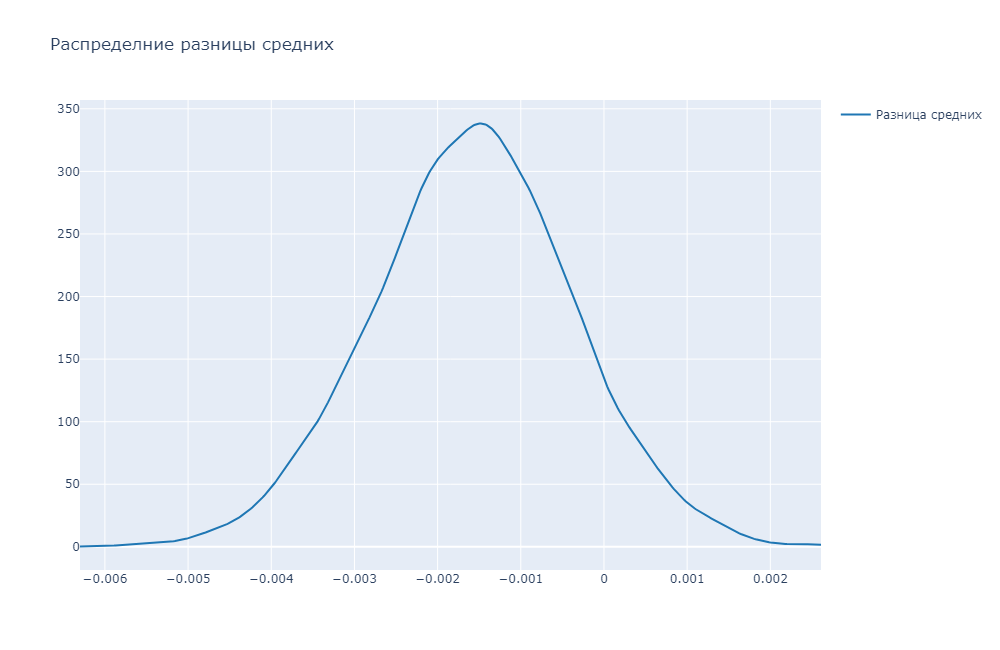

In [8]:
boot_1d['diff'] = boot_1d.new_page-boot_1d.old_page

hist_data = [list(boot_1d['diff'])]
group_labels = ['Разница средних']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, bin_size=.01, show_rug=False)

fig.update_layout(height=650, width=1000, title_text='Распределние разницы средних')
fig.show()

display(Image(filename='img/avg_diff_distribution.png', width=800))

Посчитаем 95%-й доверительный интервал для разницы средних.

In [9]:
alpha=0.05

left = np.quantile(boot_1d['diff'], alpha/2)
right = np.quantile(boot_1d['diff'], 1-alpha/2)

print(left, right)

-0.003935544434119581 0.0007763597470910007


Ноль попадает в доверительный интервал, значит на уровне значимости 5% разницы между исследуемыми группами нет. Изменения в конверсии можно считать статистически не значимыми.